In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import time
from audio_util import *
c4 = 261.626

In [3]:
for n, d in SCALE_RATIO:
    pyaudioPlay(n, d)

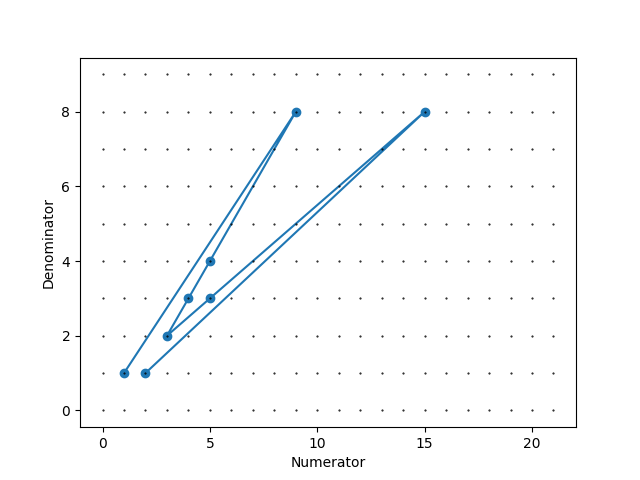

In [4]:
# %matplotlib notebook
%matplotlib widget
plt.close('all')

fig = plt.figure()

plt.plot(SCALE_RATIO[:, 0], SCALE_RATIO[:, 1], '-o', picker=True)
for n in range(10):
    for m in range(22):
        plt.plot(m, n, 'k.', markersize=1)
plt.xlabel('Numerator')
plt.ylabel('Denominator')
# plt.axis('equal')
# txt = plt.text(5, 5, 'test')
def onclick(event):
    ix, iy = event.xdata, event.ydata
    # txt.set_text(f"{int(round(ix))}, {int(round(iy))}")
    pyaudioPlay(int(round(ix)), int(round(iy)), c4)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [131]:
i = [0, 2, 4, 7]
# for n, d in scale[i]:
#     pyaudioPlay(n, d)
interval = []
for n in range(1, len(i)):
    interval.append(scale[i[n], :] / scale[i[n-1]])
interval = np.array(interval)
print(interval)
    

[[5.         4.        ]
 [0.6        0.5       ]
 [0.66666667 0.5       ]]


In [136]:
# pos = np.array((1, 1), dtype=float)
# pos = np.array((4, 3), dtype=float)
pos = np.array((9, 8), dtype=float)
for i in interval:
    pyaudioPlay(*pos, c4)
    pos *= i
pyaudioPlay(*pos, c4)

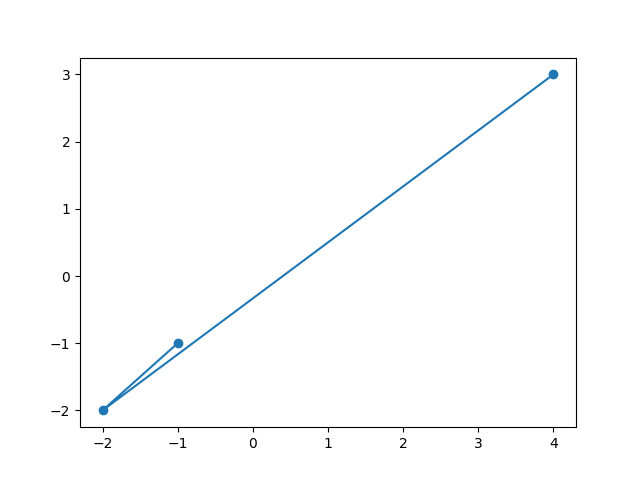

In [114]:
plt.figure()
plt.plot(interval[:, 0], interval[:, 1], '-o')

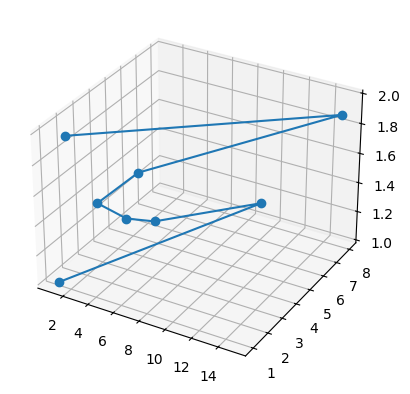

In [7]:
# %matplotlib ipympl
%matplotlib inline
ax = plt.figure().add_subplot(projection='3d')

ax.plot(scale[:, 0], scale[:, 1], scale[:, 0] / scale[:, 1], '-o')

In [4]:
notes = 'CDEFGABC'
for n in notes:
    f = note2f(n)
    print(n, f)
    # if f < c4*2:
    #     f *= 2
    pyaudioPlayF(f)

C 523.2511306011972
D 587.3295358348151
E 659.2551138257398
F 698.4564628660078
G 783.9908719634985
A 440.0
B 493.8833012561241
C 523.2511306011972


In [159]:
f2note(523.25*.5)

'C'

In [2]:
c = Note('C')
d = Note('D')
print(c, c.interval(Third()), c + 4, c.twelfth(), c.freq(c4, 2*c4), d.freq(c4, 2*c4))

<Note: C> <Note: E> <Note: E> 12 523.2511306011972 293.6647679174076


In [14]:
%matplotlib widget

# fig = plt.figure()


root = Note('C')

latice = np.empty((3, 4), dtype=Note)
for n in range(latice.shape[1]):
    latice[1, n] = root + Fifth() * n

for n in range(latice.shape[1]):
    latice[0, n] = (root + Third()) + Fifth() * n

for n in range(latice.shape[1]):
    latice[2, n] = (root - Third()) + Fifth() * n

latice

array([[<Note: E>, <Note: B>, <Note: F#>, <Note: C#>],
       [<Note: C>, <Note: G>, <Note: D>, <Note: A>],
       [<Note: G#>, <Note: D#>, <Note: A#>, <Note: F>]], dtype=object)

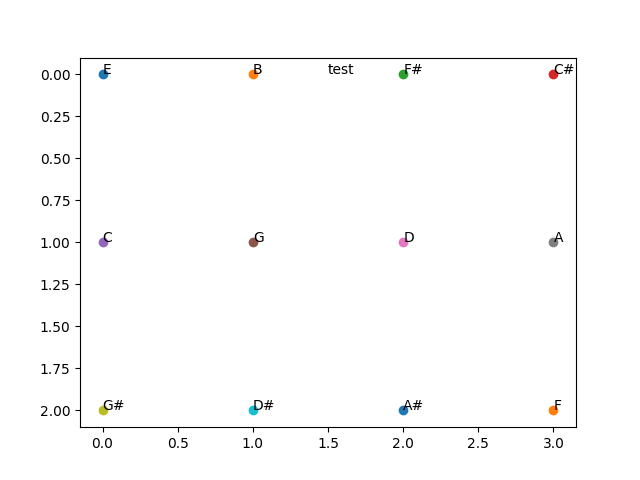

In [15]:
fig = plt.figure()

for m in range(3):
    for n in range(latice.shape[1]):
        note = latice[m, n]
        plt.plot(n, m, 'o', picker=True)
        plt.annotate(note.name(), (n, m))
plt.gca().invert_yaxis()
txt = plt.text(1.5, 0, 'test')

def onclick(event):
    ix, iy = int(round(event.xdata)), int(round(event.ydata))
    
    note = latice[iy, ix]
    
    # txt.set_text(f"{ix}, {iy}")
    # txt.set_txt(f"{note.name()}")
    # txt.set_txt(f"{note.freq(c4, 2*c4)}")
    # f = latice.tolist()[iy][ix].freq(c4, 2*c4)
    f = latice[iy, ix].freq(c4, 2*c4)
    print(f"{f:.1f}")
    pyaudioPlayF(f)
    txt.set_text(f"{iy}, {ix}: {iy % latice.shape[0]}, {ix % latice.shape[1]}")
    # pyaudioPlayF(note._f)

cid = fig.canvas.mpl_connect('button_press_event', onclick)